In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set(style='darkgrid',context='notebook',color_codes='cubehelix')

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(529)

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

# Information gathering from Dataset

/tmp/ipykernel_18587/2086436742.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ReadyToShift['location'].value_counts().head(10),palette='cubehelix')


<Axes: xlabel='location', ylabel='count'>

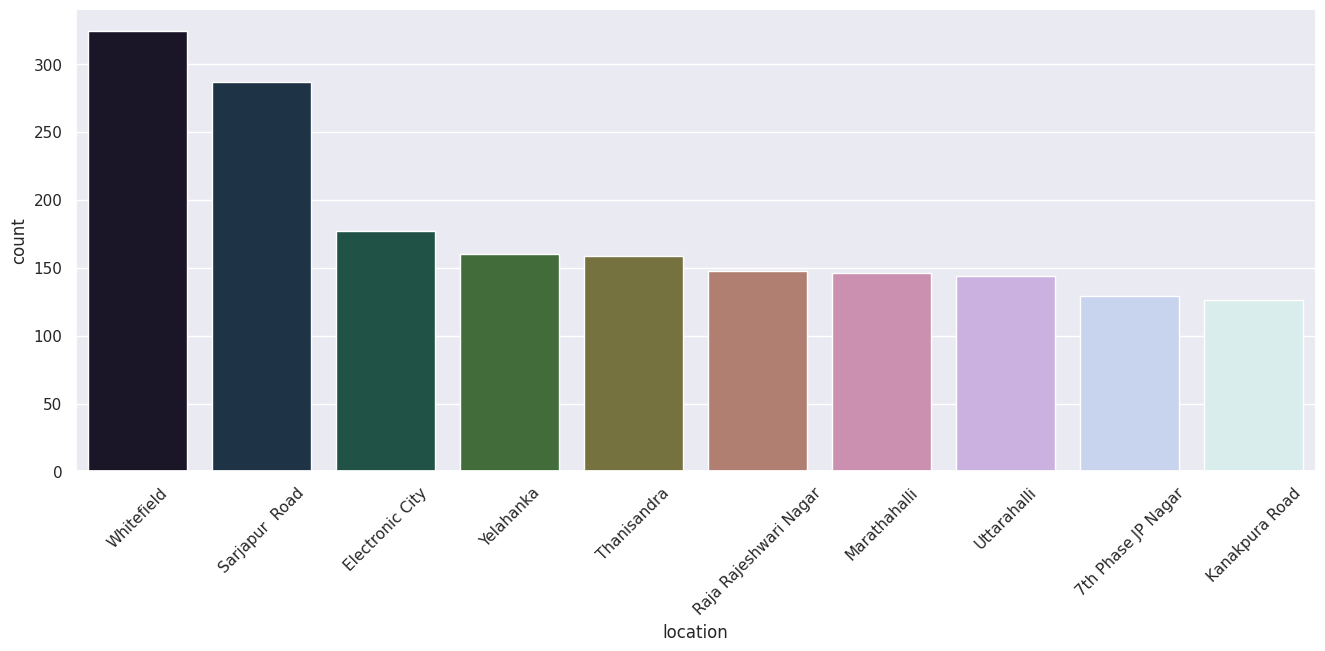

In [8]:
ReadyToShift = df[df['availability'] == "Ready To Move"]
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.barplot(ReadyToShift['location'].value_counts().head(10),palette='cubehelix')

In [9]:
# ReadyToShift['location'].unique()

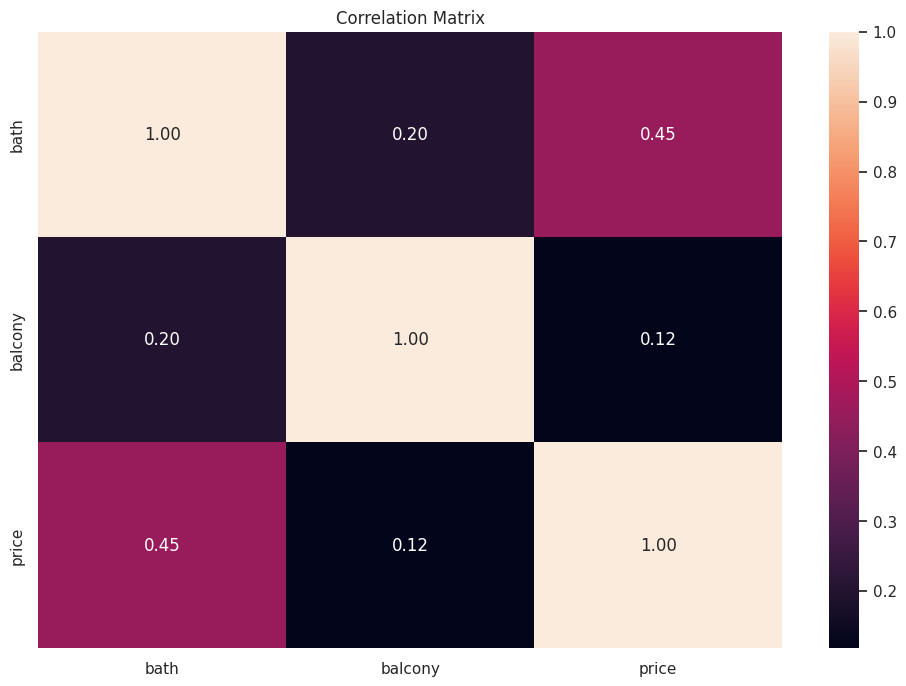

In [10]:
plt.figure(figsize=(12,8))
corr_matrix = df.drop(columns=df.select_dtypes('object').columns).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


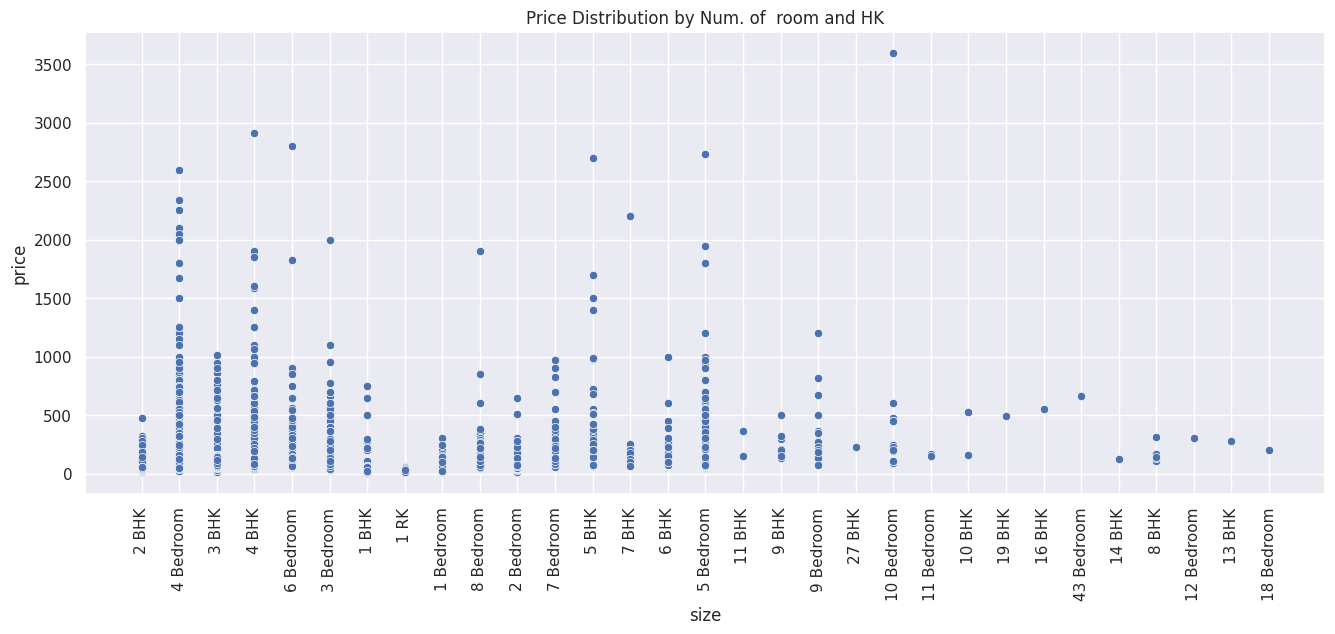

In [11]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='size', y='price', data=df)
plt.title("Price Distribution by Num. of  room and HK")
plt.xticks(rotation=90)
plt.show()

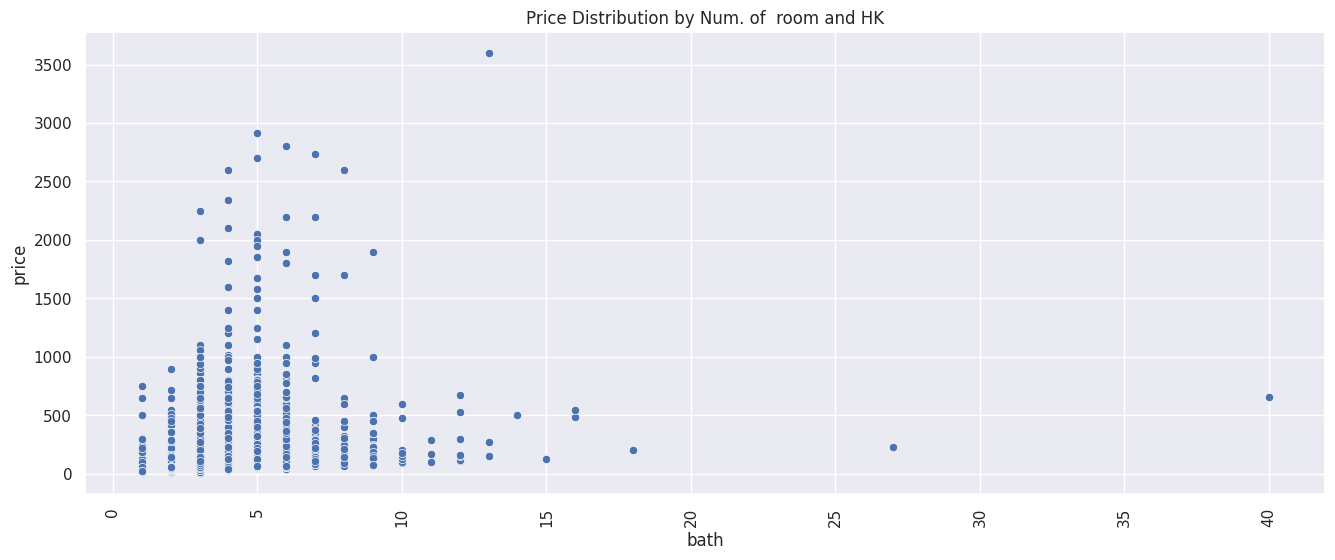

In [12]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='bath', y='price', data=df)
plt.title("Price Distribution by Num. of  room and HK")
plt.xticks(rotation=90)
plt.show()

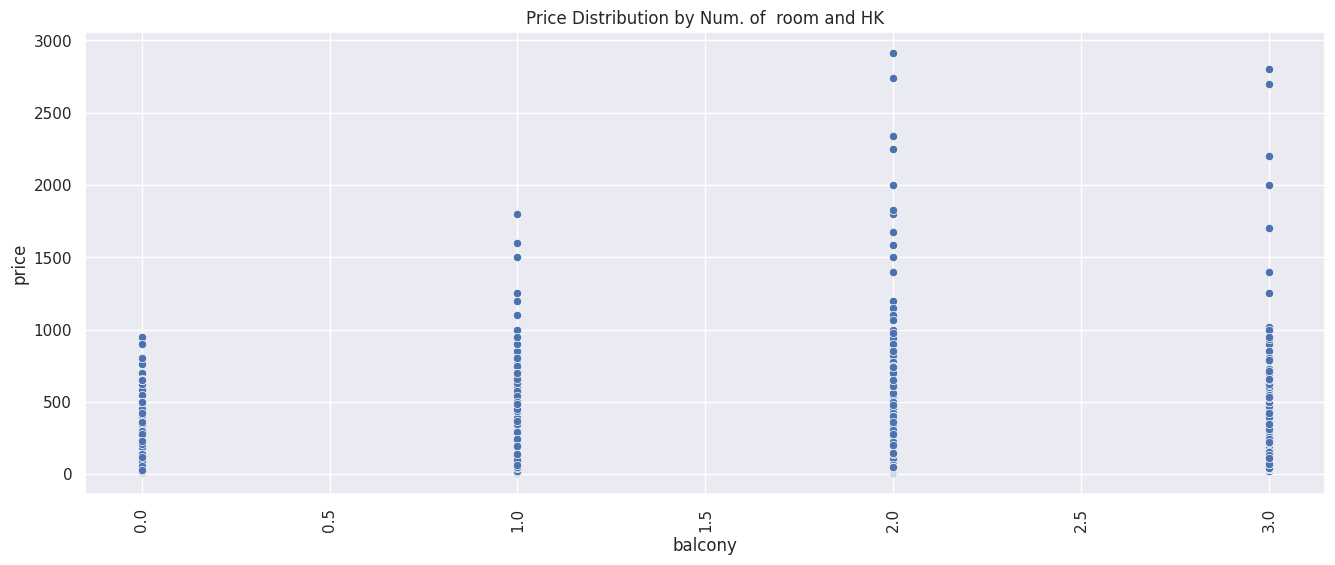

In [13]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='balcony', y='price', data=df)
plt.title("Price Distribution by Num. of  room and HK")
plt.xticks(rotation=90)
plt.show()

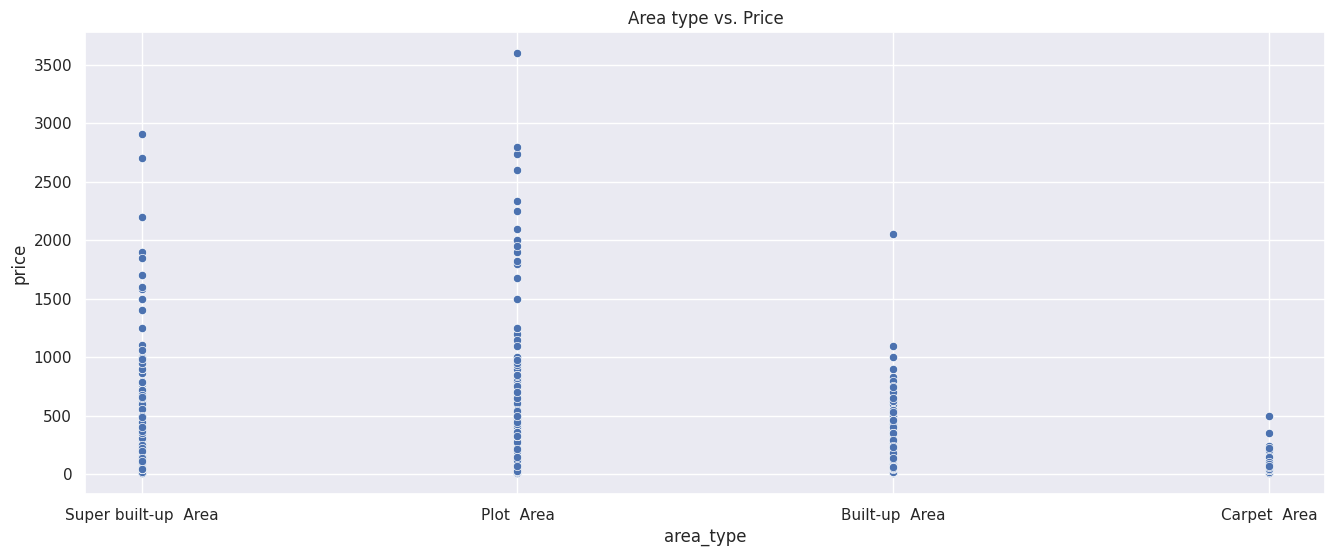

In [14]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='area_type', y='price', data=df)
plt.title("Area type vs. Price")
plt.show()


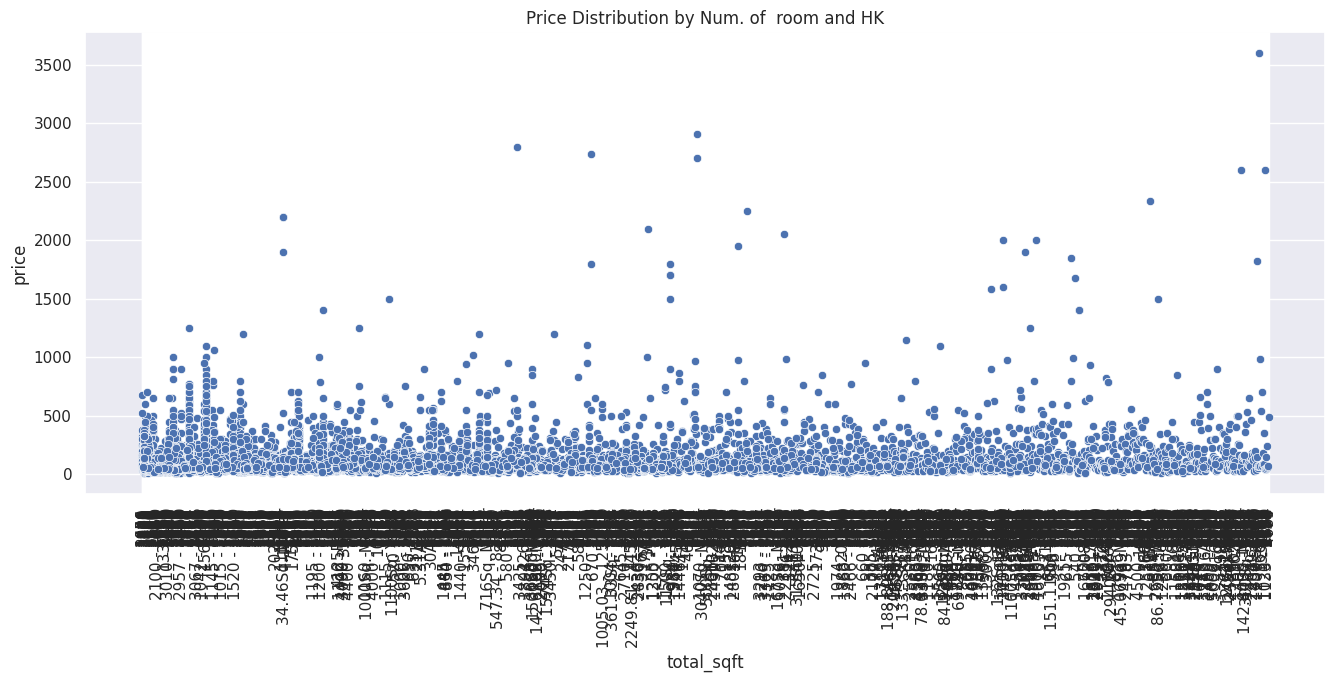

In [15]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title("Price Distribution by Num. of  room and HK")
plt.xticks(rotation=90)
plt.show()

array([[<Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'balcony'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

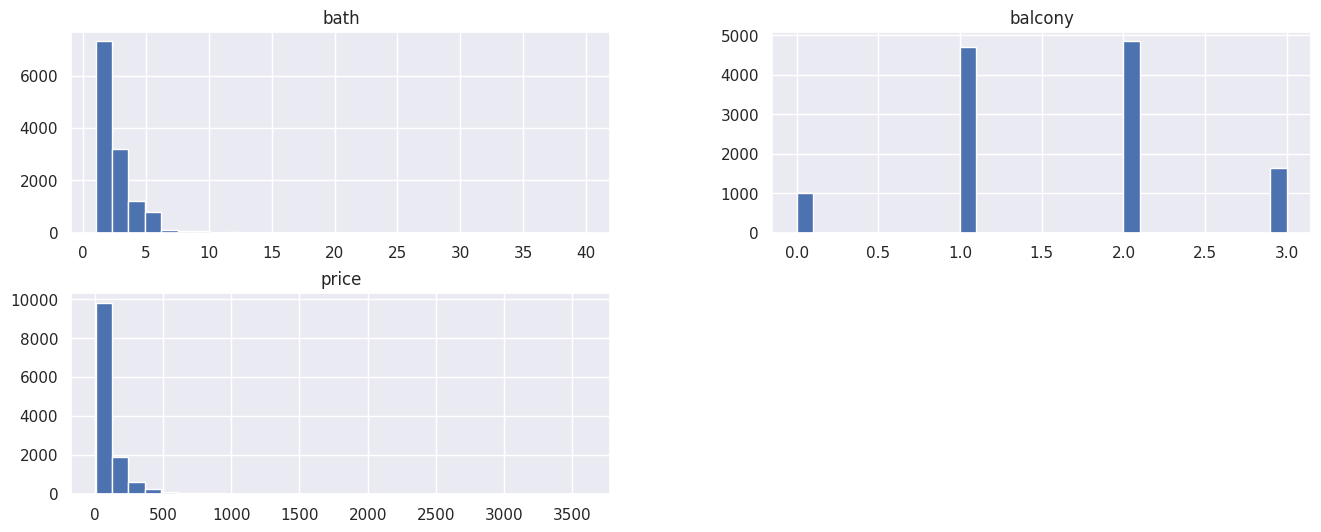

In [16]:
df.hist(bins=30, figsize=(16,6))

In [17]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [18]:
print(df.isnull().sum()[df.isnull().sum().values > 0])

location       1
size          16
society     5328
bath          73
balcony      605
dtype: int64


In [19]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

# Handling missing values

In [20]:
df = df.dropna()
df.shape

(7144, 9)

# Feature engineering

In [21]:
df.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9759,Built-up Area,Ready To Move,Bagalur,4 BHK,Krton S,2400,4.0,3.0,135.00
3529,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1140,2.0,2.0,38.55
4288,Carpet Area,18-Dec,Bhoganhalli,3 BHK,Rosha I,1053.4,3.0,1.0,88.91
9676,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,3 BHK,GrrvaGr,1529,3.0,3.0,51.77
8916,Super built-up Area,Ready To Move,Thanisandra,3 BHK,Bhmesy,1573,3.0,2.0,98.00
9270,Super built-up Area,20-Dec,Kanakpura Road,2 BHK,PrarePa,700,1.0,1.0,41.00
11871,Super built-up Area,Ready To Move,Yelahanka,3 BHK,Pyikad,1756,3.0,2.0,125.00
12192,Super built-up Area,Ready To Move,Thigalarapalya,4 BHK,Prtanha,3122,6.0,2.0,250.00
8524,Super built-up Area,Ready To Move,8th Phase JP Nagar,3 BHK,GRhtsei,1504,2.0,2.0,83.00
4266,Super built-up Area,19-Dec,Yelahanka,3 BHK,Masser,1400,2.0,2.0,80.54


In [22]:
df['Bedrooms'] = df['size'].str.split(' ').str.get(0)
df['Bedrooms'].unique()

array(['2', '4', '3', '1', '5', '11', '9', '6', '7'], dtype=object)

In [23]:
df['is_hallKitchen'] = df['size'].str.contains('HK')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Bedrooms,is_hallKitchen
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2,True
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4,False
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3,True
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2,True
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4,False
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,Shncyes,1000,2.0,1.0,38.00,2,True
14,Plot Area,Ready To Move,Sarjapur,3 Bedroom,Skityer,2250,3.0,2.0,148.00,3,False
15,Super built-up Area,Ready To Move,Mysore Road,2 BHK,PrntaEn,1175,2.0,2.0,73.50,2,True
16,Super built-up Area,Ready To Move,Bisuvanahalli,3 BHK,Prityel,1180,3.0,2.0,48.00,3,True
17,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,3 BHK,GrrvaGr,1540,3.0,3.0,60.00,3,True


In [24]:
def conv(x):
    if 'Yards' in x:
        x = x.split(' ')
        x[0] = float(x[0].replace('Sq.',''))
        val = int(x[0]*9)
        return val
    elif 'Meter' in x:
        x = x.split(' ')
        x[0] = float(x[0].replace('Sq.',''))
        val = int(x[0]*10.7639)
        return val
    elif ' - ' in x:
        x = x.split('-')
        mean = (float(x[0]) + float(x[1]))/2
        return int(mean)
    elif 'Acres' in x:
        x = x.replace('Acres','')
        return x*43560
    else:
        return x

In [25]:
df['total_sqft'] = df['total_sqft'].apply(conv)

In [26]:
df['total_sqft'] = df['total_sqft'].astype('float')

In [27]:
df['balcony'] = df['balcony'].astype('int')

In [28]:
df['bath'] = df['bath'].astype('int')

In [29]:
df = df.drop(columns='size')

In [30]:
df.dtypes

area_type          object
availability       object
location           object
society            object
total_sqft        float64
bath                int64
balcony             int64
price             float64
Bedrooms           object
is_hallKitchen       bool
dtype: object

In [31]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,Bedrooms,is_hallKitchen
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2,1,39.07,2,True
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5,3,120.00,4,False
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3,1,95.00,3,True
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2,1,38.00,2,True
11,Plot Area,Ready To Move,Whitefield,Prrry M,2785.0,5,3,295.00,4,False


# EDA

In [32]:
df.columns

Index(['area_type', 'availability', 'location', 'society', 'total_sqft',
       'bath', 'balcony', 'price', 'Bedrooms', 'is_hallKitchen'],
      dtype='object')

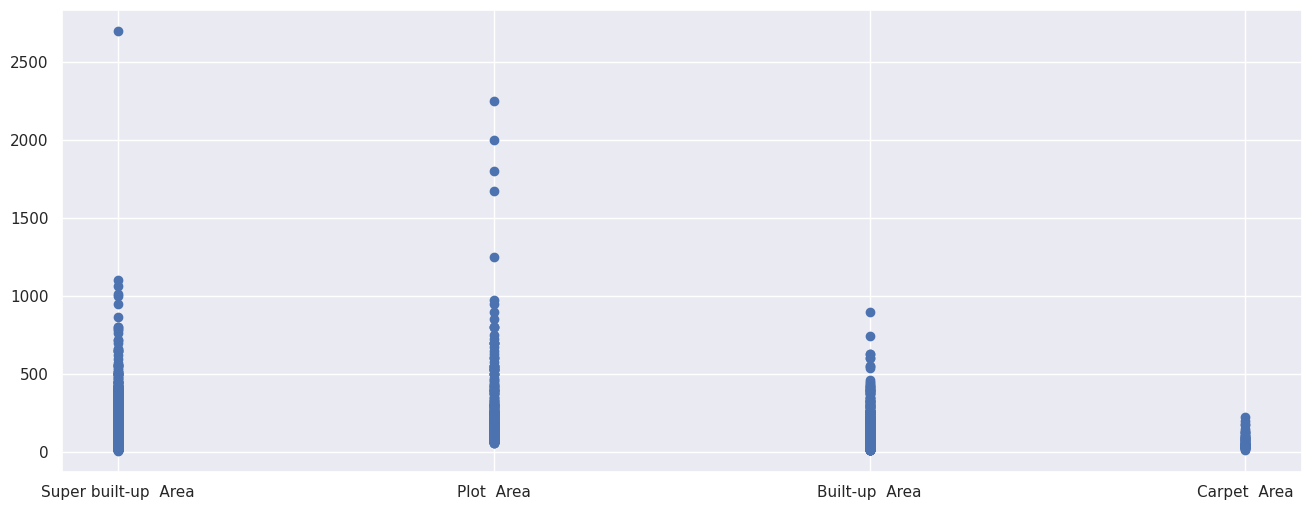

In [33]:
plt.figure(figsize=(16,6))
plt.scatter(data=df, x='area_type',y='price')

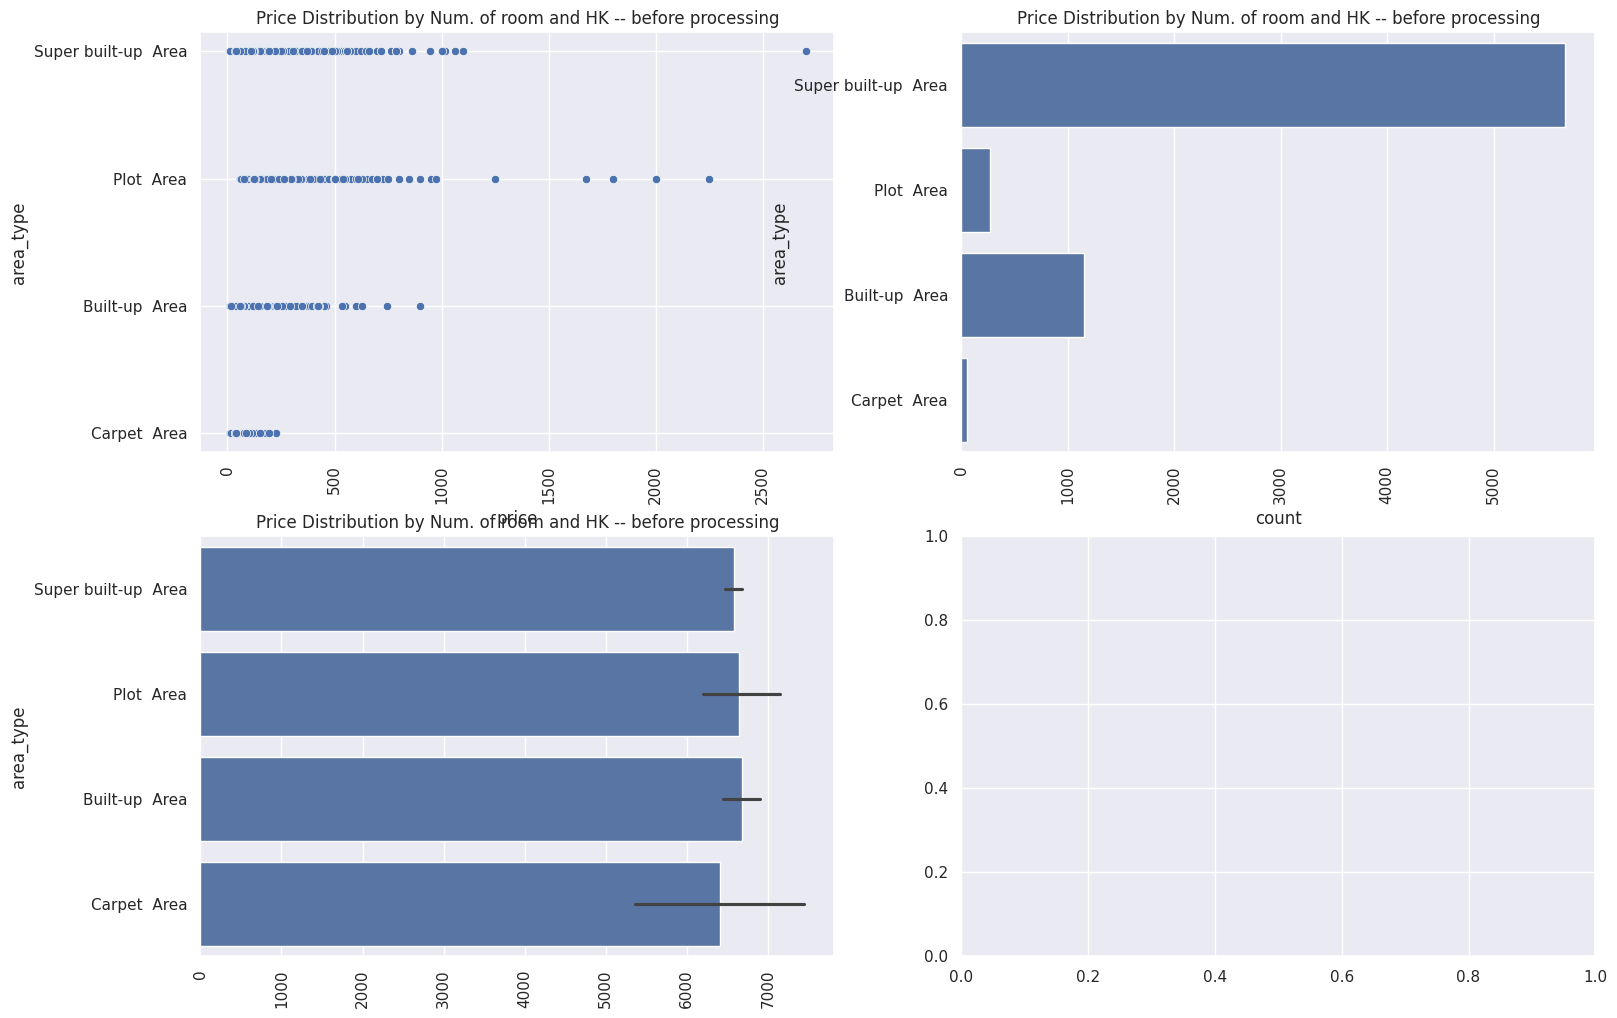

In [34]:
# plt.figure(figsize=(16,6))
# plt.scatter(data=df, x='Bedrooms',y='price')
fig, axes = plt.subplots(2,2, figsize=(18,12))

sns.scatterplot(y='area_type', x='price', data=df, ax=axes[0,0])
axes[0,0].set_title("Price Distribution by Num. of room and HK -- before processing")
axes[0,0].tick_params(axis='x', rotation=90)

sns.countplot(df['area_type'], ax=axes[0,1])
axes[0,1].set_title("Price Distribution by Num. of room and HK -- before processing")
axes[0,1].tick_params(axis='x', rotation=90)

sns.barplot(df['area_type'], ax=axes[1,0])
axes[1,0].set_title("Price Distribution by Num. of room and HK -- before processing")
axes[1,0].tick_params(axis='x', rotation=90)

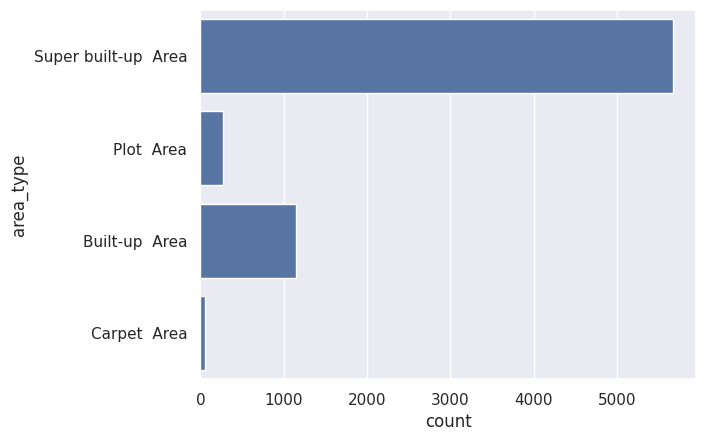

In [35]:
ax = sns.countplot(df['area_type'])
ax.set_label(ax.containers[0])

In [36]:
df.head(5)

,area_type,availability,location,society,total_sqft,bath,balcony,price,Bedrooms,is_hallKitchen
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2,1,39.07,2,True
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5,3,120.00,4,False
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3,1,95.00,3,True
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2,1,38.00,2,True
11,Plot Area,Ready To Move,Whitefield,Prrry M,2785.0,5,3,295.00,4,False


In [37]:
df.dtypes

area_type          object
availability       object
location           object
society            object
total_sqft        float64
bath                int64
balcony             int64
price             float64
Bedrooms           object
is_hallKitchen       bool
dtype: object

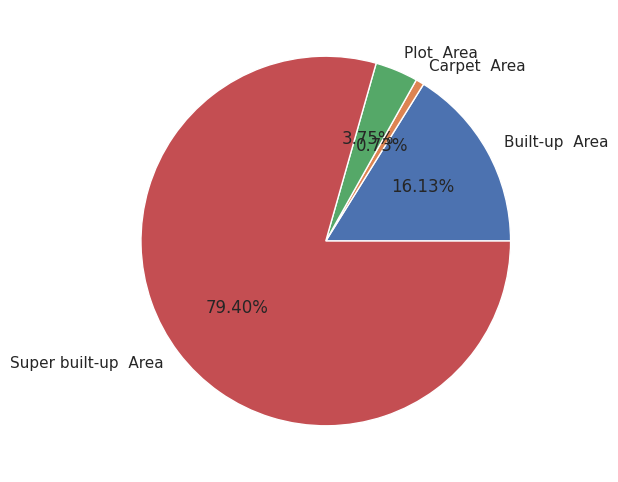

In [38]:
temp_df = df.groupby('area_type')['area_type'].count()
plt.figure(figsize=(6,6))
plt.pie(temp_df,labels=temp_df.index, autopct="%1.2f%%")
plt.show()

"***Super built-up Area***" area type is comparetively required more than other area type

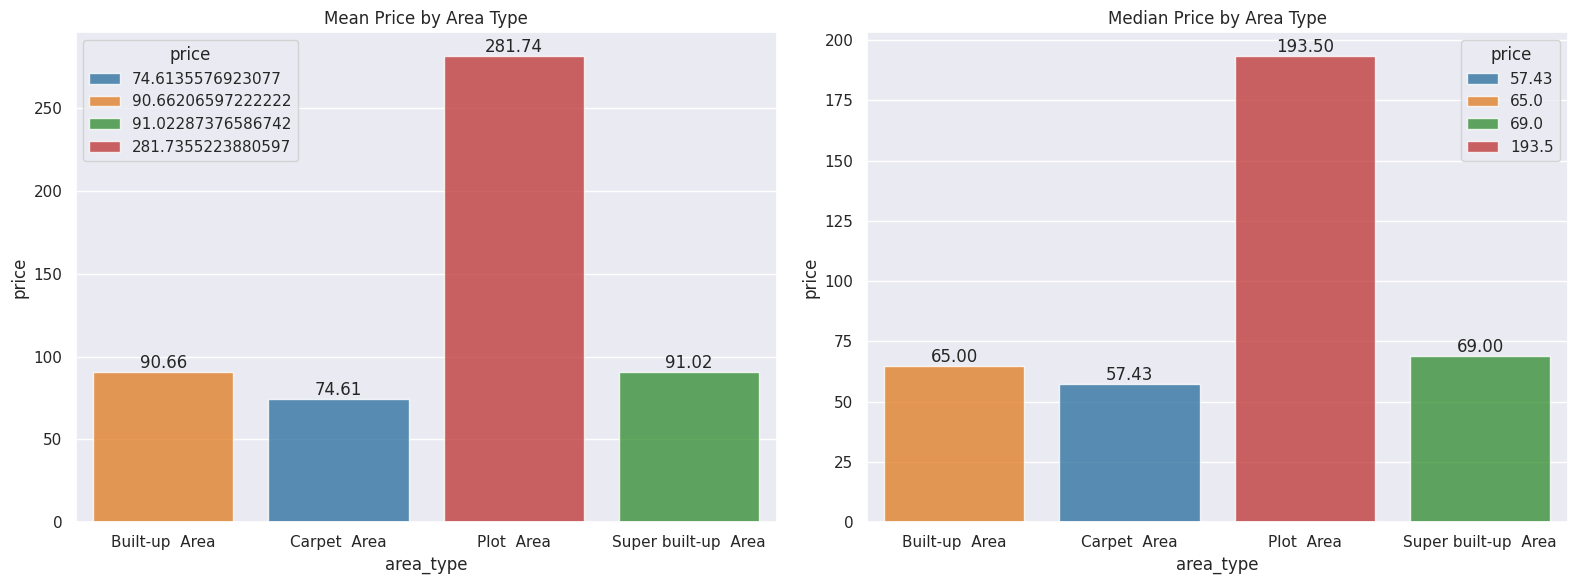

In [39]:
mean_df = df.groupby('area_type')['price'].mean().reset_index()
median_df = df.groupby('area_type')['price'].median().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mean price barplot
sns.barplot(x='area_type', y='price', data=mean_df, ax=axes[0], alpha=0.8, palette='tab10' , hue='price')
axes[0].set_title('Mean Price by Area Type')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%.2f")

# Median price barplot
sns.barplot(x='area_type', y='price', data=median_df, ax=axes[1], alpha=0.8, palette='tab10' , hue='price')
axes[1].set_title('Median Price by Area Type')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.2f")

plt.tight_layout()
plt.show()


This chart shows "**Plot  Area**" has comaratively highe price than other area types, "**Super built-up Area**" has decent price

In [40]:
df['is_available'] = df['availability'] == 'Ready To Move'

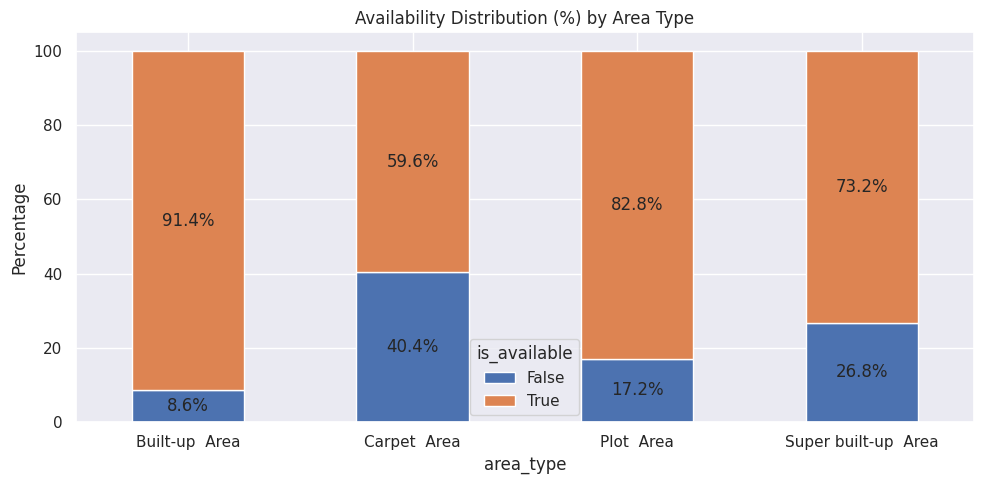

                        min     max        mean  median  count
area_type                                                     
Built-up  Area        10.25   900.0   90.662066   65.00   1152
Carpet  Area          13.00   225.0   74.613558   57.43     52
Plot  Area            56.72  2250.0  281.735522  193.50    268
Super built-up  Area   8.00  2700.0   91.022874   69.00   5672


In [41]:
total_count = df.groupby('area_type')['is_available'].value_counts(normalize=True).unstack() * 100
ax = total_count.plot(kind='bar', stacked=True, figsize=(10, 5))

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center')

plt.ylabel("Percentage")
plt.title("Availability Distribution (%) by Area Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(df.groupby('area_type')['price'].agg(('min','max','mean','median','count')))

Average price of "**Plot area**" is more higher than other area type, "**Super built-up Area**" has affordable price range, this is reason behind high demand and availability of "**Super built-up Area**" area type rather than other types.

In [42]:
# removed infinite value from "total_sqft"
df = df[np.isfinite(df['total_sqft'])]

In [43]:
df.dtypes

area_type          object
availability       object
location           object
society            object
total_sqft        float64
bath                int64
balcony             int64
price             float64
Bedrooms           object
is_hallKitchen       bool
is_available         bool
dtype: object

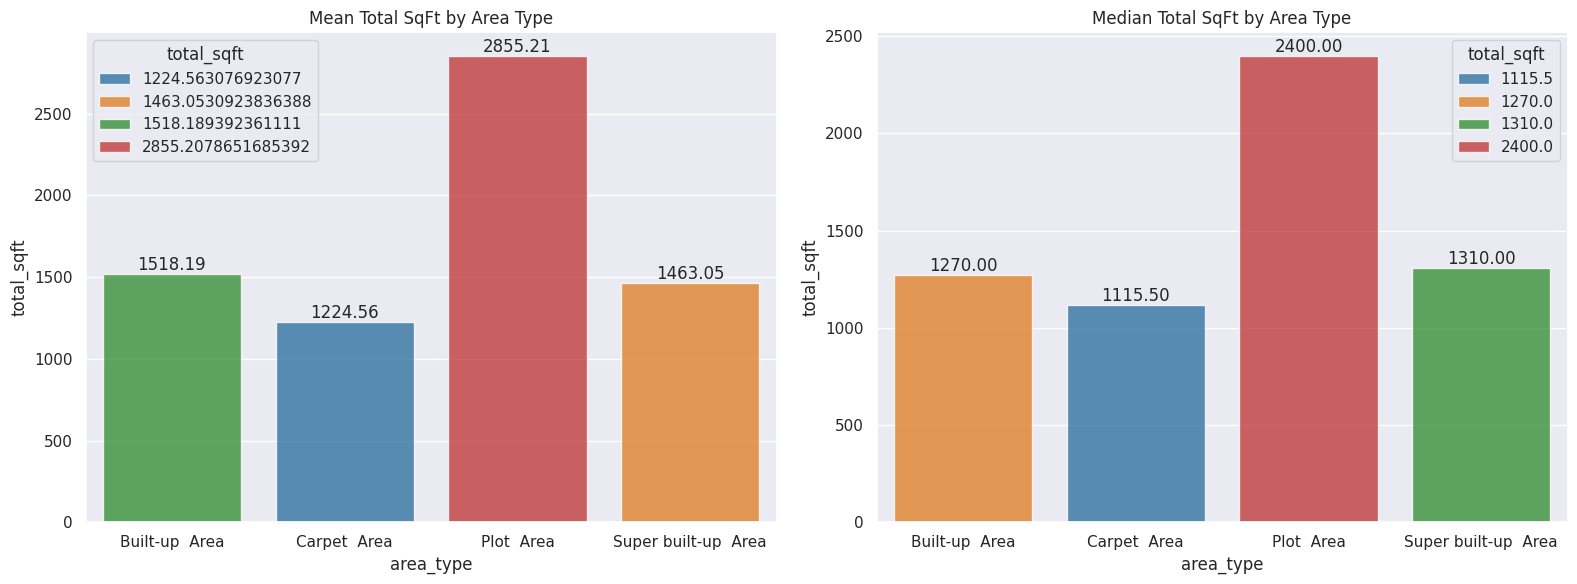

                        min      max         mean  median
area_type                                                
Built-up  Area        350.0  35000.0  1518.189392  1270.0
Carpet  Area          381.0   4500.0  1224.563077  1115.5
Plot  Area             11.0  16145.0  2855.207865  2400.0
Super built-up  Area  284.0  36000.0  1463.053092  1310.0


In [44]:
mean_df = df.groupby('area_type')['total_sqft'].mean().reset_index()
median_df = df.groupby('area_type')['total_sqft'].median().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mean price barplot
sns.barplot(x='area_type', y='total_sqft', data=mean_df, ax=axes[0], alpha=0.8, palette='tab10' , hue='total_sqft')
axes[0].set_title('Mean Total SqFt by Area Type')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%.2f")

# Median price barplot
sns.barplot(x='area_type', y='total_sqft', data=median_df, ax=axes[1], alpha=0.8, palette='tab10' , hue='total_sqft')
axes[1].set_title('Median Total SqFt by Area Type')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.2f")

plt.tight_layout()
plt.show()

print(df.groupby('area_type')['total_sqft'].agg(('min','max','mean','median')))

In this chart we can see "**Plot Area**" provides larger space in Square-Feets in comparision to other Area type, this is a reason why "**Plot Area**" has comperatively higher price than other area types

In [45]:
# Type conversion of "Bedrooms"
df['Bedrooms'] = df['Bedrooms'].astype('int')

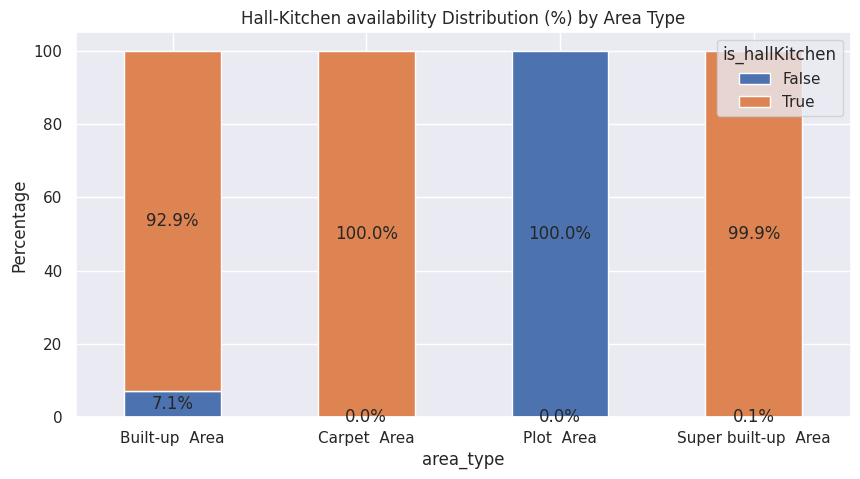

In [46]:
total_count = df.groupby('area_type')['is_hallKitchen'].value_counts(normalize=True).unstack() * 100
ax = total_count.plot(kind='bar', stacked=True, figsize=(10, 5))

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center')

plt.ylabel("Percentage")
plt.title("Hall-Kitchen availability Distribution (%) by Area Type")
plt.xticks(rotation=0)
plt.show()

By this chart we can see that, "**Plot Area**" does not have Hall-Kitchen which makes it unpreferable option in comparision to other area types.

In [47]:
society_price = df.groupby('society')['price'].mean().reset_index()
society_price = society_price.dropna().sort_values(by='price', ascending=False)

top_10_societies = society_price.head(10)
least_10_societies = society_price.tail(10)

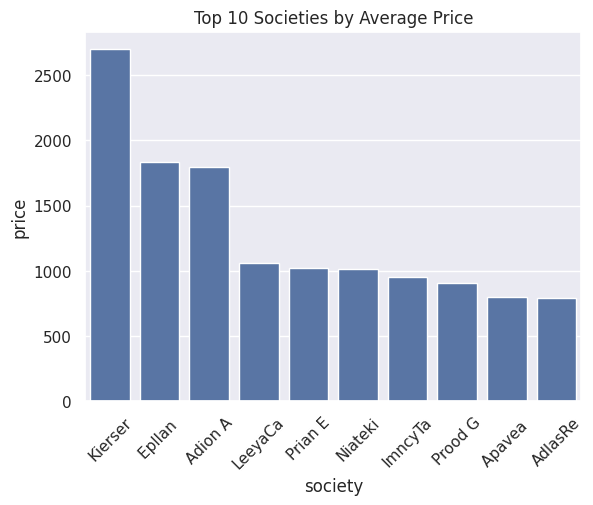

In [48]:
sns.barplot(x=top_10_societies['society'],y=top_10_societies['price'])
plt.title("Top 10 Societies by Average Price")
plt.xticks(rotation=45)
plt.show()

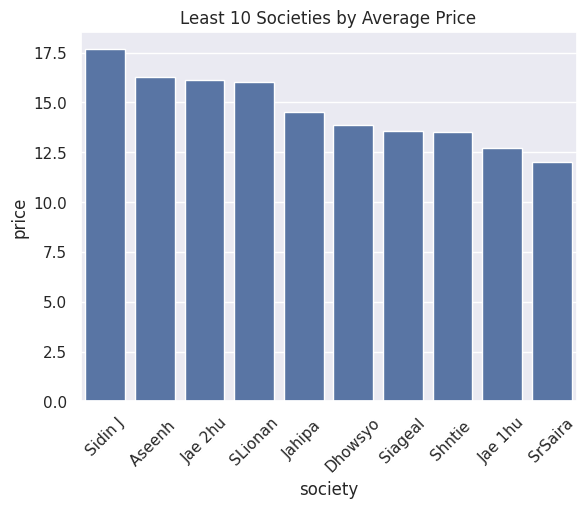

In [49]:
sns.barplot(x=least_10_societies['society'],y=least_10_societies['price'])
plt.title("Least 10 Societies by Average Price")
plt.xticks(rotation=45)
plt.show()

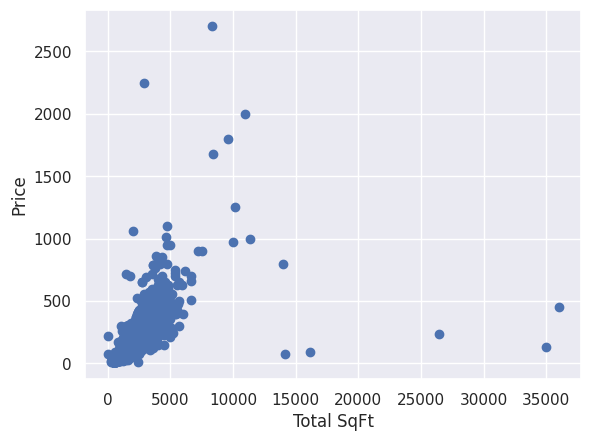

In [50]:
plt.scatter(x=df['total_sqft'],y=df['price'])
plt.xlabel('Total SqFt')
plt.ylabel('Price')
plt.show()

This chart shows that most homes have less than **5000 square feet** and their **prices** are under **1000**, meaning they are regular-sized and more common. Some homes are much bigger and more expensive — these are rare and could be luxury or special properties.

Most properties are **normal-sized** and **affordable**, while a few are very large and costly, showing they are rare and likely **luxury homes**.

/tmp/ipykernel_18587/3449574568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df.groupby('Bedrooms')['price'].count(),palette='tab10')


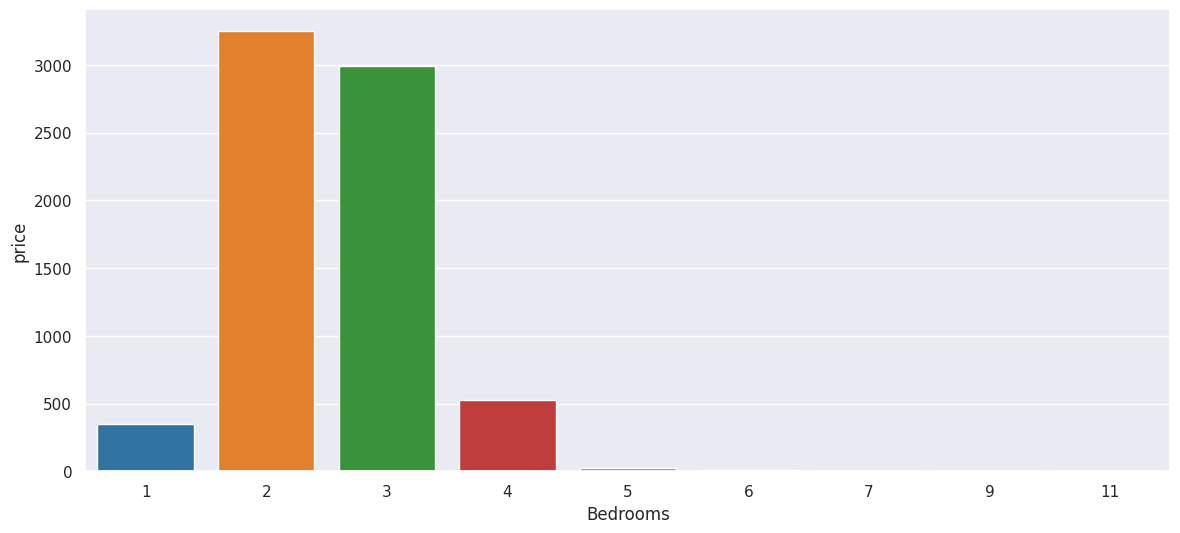

In [51]:
plt.figure(figsize=(14,6))
sns.barplot(df.groupby('Bedrooms')['price'].count(),palette='tab10')
plt.show()

Most properties have 2 or 3 bedrooms and are sold the most, while homes with more than 4 bedrooms are very few and less sold, likely due to being costly or too big for most buyers.

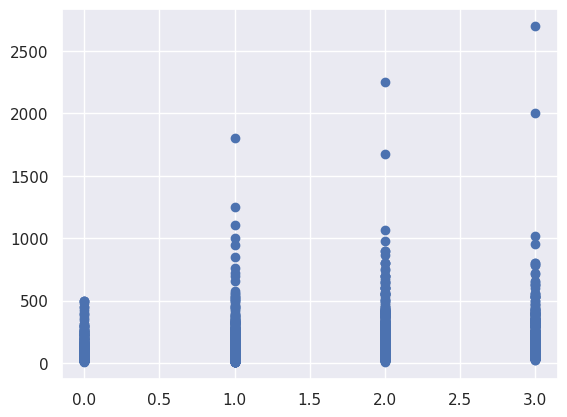

In [52]:
plt.scatter(df['balcony'],df['price'])

In [53]:
df.head(4)

,area_type,availability,location,society,total_sqft,bath,balcony,price,Bedrooms,is_hallKitchen,is_available
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2,1,39.07,2,True,False
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5,3,120.00,4,False,True
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3,1,95.00,3,True,True
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2,1,38.00,2,True,True


# Removing Outliers

In [54]:
df['bath'].value_counts()
df = df[df['bath'] < 7]
df['bath'].value_counts()

bath
2    4055
3    1980
4     437
1     412
5     181
6      71
Name: count, dtype: int64

In [55]:
df['Bedrooms'].value_counts()
df = df[df['Bedrooms'] < 6]
df['Bedrooms'].value_counts()

Bedrooms
2    3248
3    2988
4     524
1     349
5      21
Name: count, dtype: int64

# Predictive Machine Learning

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

## Data preprocessing

In [57]:
df.drop(columns='society').duplicated().sum()

np.int64(6)

In [58]:
df = df.drop(columns='society')
df = df.drop_duplicates()

In [59]:
df.drop(columns=['is_available','availability']).duplicated().sum()
df = df.drop(columns=['bath','balcony','is_available','availability'])

In [60]:
df = df.drop_duplicates()

In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns.tolist():
    le = LabelEncoder()
    df[col] = df[col].astype(str)  # Ensure all values are strings
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [63]:
df.head(5)

,area_type,location,total_sqft,price,Bedrooms,is_hallKitchen
0,3,209,1056.0,39.07,2,True
1,2,148,2600.0,120.00,4,False
3,3,386,1521.0,95.00,3,True
5,3,624,1170.0,38.00,2,True
11,2,624,2785.0,295.00,4,False


In [64]:
X = df.drop(columns=['price'], axis=1)
y = df['price']
print("X shape",X.shape)
print("y shape",y.shape)

X shape (6941, 5)
y shape (6941,)


In [65]:
X.head(3)

,area_type,location,total_sqft,Bedrooms,is_hallKitchen
0,3,209,1056.0,2,True
1,2,148,2600.0,4,False
3,3,386,1521.0,3,True


In [66]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()
print(categorical_cols)
print(numerical_cols)

[]
['area_type', 'location', 'total_sqft', 'Bedrooms', 'is_hallKitchen']


In [67]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 [])])

## Training Machinea learning models

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print("Train shape",X_train.shape)
print("Test shape",X_test.shape)

Train shape (5552, 5)
Test shape (1389, 5)


In [69]:
model_accuracy = {}
models_list = []

# Grid for parameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}


In [70]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [71]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"{name}")
    print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print("-" * 35)
    models_list.append(model)
    model_accuracy[name] = r2_score(y_test, y_pred)

Linear Regression
R² Score: 0.422
MSE: 7177.12
-----------------------------------
Decision Tree
R² Score: 0.552
MSE: 5558.52
-----------------------------------
Random Forest
R² Score: 0.825
MSE: 2175.67
-----------------------------------


/tmp/ipykernel_18587/3530639852.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(model_accuracy,palette='tab10')


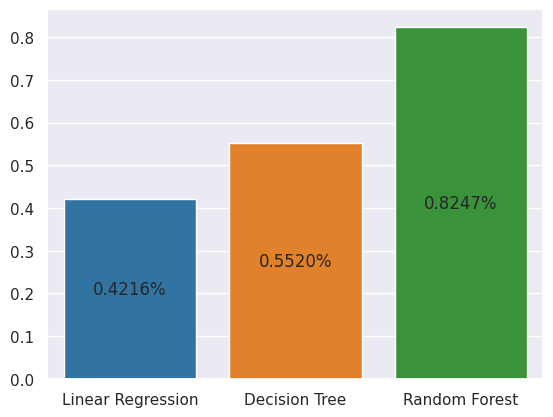

In [72]:
ax = sns.barplot(model_accuracy,palette='tab10')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.4f%%', label_type='center')
plt.show()

In [73]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [74]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,cv=3, n_jobs=-1, verbose=2, scoring='r2')
print(grid_search)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='r2', verbose=2)


In [75]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=   1.2s
[CV] END max_depth=10, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_split=10, n_e

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='r2', verbose=2)

In [76]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_pred

array([180.24301848,  42.52610453,  57.86981381, ...,  53.86505744,
        50.91030719,  60.54173966])

In [77]:
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
R² Score: 0.8303924903922089
MSE: 2104.4729160370325


In [78]:
import pickle as pkl

In [79]:
with open('house_price_model.pkl', 'wb') as f:
    pkl.dump(grid_search.best_estimator_, f)

In [80]:
with open('label_encoders.pkl', 'wb') as f:
    pkl.dump(label_encoders, f)

In [81]:
sample_input = {
    'area_type': 'Built-up  Area',
    'location': 'Electronic City',
    'total_sqft': 5000.0,
    'Bedrooms': 2,
    'is_hallKitchen': True
}
df_input = pd.DataFrame([sample_input])

In [82]:
for col in df_input.select_dtypes(include='object').columns:
    le = label_encoders.get(col)
    if le:
        df_input[col] = le.transform(df_input[col])